# k-means im 1-dim 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import random 
import itertools
from IPython.display import display, Markdown, Latex



Als Beispiel nehmen wir an wir haben eine Menge an Punkten auf einer 1-Dimensionalen Skala. 

In [2]:
def create_data(n_clusters=3, vals_per_cluster=5):
    #random.seed(seed)
    distance = vals_per_cluster * 2.5
    cluster_span = 5
    
    # all clusters 
    clusters = []
    center_values = []     
    center_values.append(distance)
    
    for i in range(0, n_clusters-1):
        center_values.append(center_values[-1]+distance)
        
    for c in center_values:
        cl = []
        rands = random.sample(range(- round(0.7*vals_per_cluster), round(0.7*vals_per_cluster)), vals_per_cluster)
        for r in rands:
            cl.append(c + r)

        clusters.append(cl)
    return clusters

In [3]:
def get_n_colors(n = 10, seed=10):
    #random.seed(seed)
    color = []
    
    for i in range(n):
        color.append('#%06X' % random.randint(0, 0xFFFFFF))
    return color

In [4]:
def plot_line(lower_bound, upper_bound, seed=10):
    #random.seed(seed)
    # unpack all lists
        
    # set up the figure
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(1)

    y = 5
    height = 1

    plt.hlines(y,lower_bound, upper_bound)
    plt.vlines(lower_bound, y - height / 2., y + height / 2.)
    plt.vlines(upper_bound, y - height / 2., y + height / 2.)
    
    plt.text(lower_bound - 0.2 , y, f'{lower_bound}', horizontalalignment='right')
    plt.text(upper_bound + 0.2, y, f'{upper_bound}', horizontalalignment='left')
    
    plt.axis('off')

In [5]:
def plot_clusters(clusters, colors, new_chart=True, title=""):
    all_vals = list(itertools.chain(*clusters))
    
    xmin = min(all_vals) - 2
    xmax = max(all_vals) + 2
    y=5
    
    if new_chart:
        plot_line(xmin, xmax)
    
    
    for i, cluster in enumerate(clusters): 
            col = colors[i]
            for p in cluster:
                plt.plot(p,y, 'o', ms = 10, color = col)
    
    plt.title(title)


In [6]:
def plot_points(points, color='gray', new_chart=True, title=""):
    xmin = min(points) - 2
    xmax = max(points) + 2
    y=5
    
    if new_chart:
        plot_line(xmin, xmax)
    
    for i, val in enumerate(points):
        plt.plot(val,y, 'ro', ms = 10, color = 'gray')
        
    plt.title(title)


In [7]:
def get_random_centroids(all_vals, n_cluster, seed=10):
    random.seed(10)
    rand_idxs = random.sample(range(0,  len(all_vals)), n_cluster)
    centroids = list(all_vals[i] for i in rand_idxs)
    centroids.sort()
    return centroids 

In [8]:
def get_centroids(clusters):
    centroids = []
    for cluster in clusters: 
        centroids.append(np.average(cluster))
    centroids.sort()
    return centroids 

In [9]:
def plot_centroids(centroids, colors,clusters=None, new_chart=True):        
    for i, c in enumerate(centroids):
        plt.plot(c,5, '|', ms = 50, color = colors[i])

In [10]:
def calc_dist_to_centroids(points, centroids, verbose=True):
    new_clusters = list([] for i in range(len(centroids))) 

    
    if verbose:
        print("Abstände berechnen und Gruppen zuweisen: \n")
        print(f"{'Point': <6} | C1:Dist({'%.2f'%centroids[0] : ^5}) | C2:Dist({'%.2f'%centroids[1]: ^5}) | C3:Dist({'%.2f'%centroids[2]: ^5}) | Result")
        print(f"--------------------------------------------------------------------" )
    for val in points:
        dists = []
        for c in centroids:
            dists.append(abs(val - c))
        res = dists.index(min(dists))
        if verbose:
            print(f"{'%.1f'%val: <6} | {'%2.2f' % dists[0] : >14} | {'%2.2f' %dists[1] : >14} | {'%2.2f' %dists[2] : >14} |{f'C{res+1}' : ^7}")

        new_clusters[res].append(val)
    
    if verbose:
        print(f"--------------------------------------------------------------------\n\nErgebnis nach Zuweisung:" )
        for i, cluster in enumerate(new_clusters):
            print(f"Cluster {i+1}: {cluster}")
        
    return new_clusters

In [11]:
def get_error(clusters, verbose=False):
    error = 0 
    for i, c in enumerate(clusters):
        error += np.std(c)
        if verbose:
            print(f"Cluster {i} Error: {np.std(c)}")
    return error 

In [30]:
def k_means_iteration(all_vals, clusters,colors, iteration=0, verbose=True):
    # calc the mean of each value
    centroids = get_centroids(clusters)
    # put into new clusters 
    new_clusters = calc_dist_to_centroids(all_vals, centroids, verbose=False)
    
    if verbose:
        plot_clusters(new_clusters, list('gray' for i in range(len(clusters))), new_chart=True, title=f"Iteration {iteration}")
        plot_centroids(centroids, colors=colors, new_chart=False)
        plt.show()
    error = get_error(new_clusters)
    return new_clusters, error 
    

In [13]:
def are_solutions_equal(sol1, sol2):
    assert len(sol1) == len(sol2)
    
    for i in range(len(sol1)):
        if len(sol1[i]) != len(sol2[i]):
            return False
        for j in range(len(sol1[i])):
            if sol1[i][j] is not sol2[i][j]:
                return False
    return True

In [14]:
def k_means(all_vals, verbose=True):
    init_clusters = k_means_init(all_vals)
    
    finished = False 
    cluster_its = [init_clusters]
    iteration = 0
    
    while not finished:
        new_cluster, new_error = k_means_iteration(all_vals, cluster_its[-1], iteration=iteration)
        iteration += 1
        if are_solutions_equal(new_cluster,cluster_its[-1] ):
            print("Keine Veränderung bei den Daten, also liegt das finale Ergebnis vor!")
            # end
            return new_cluster, new_error
        else:
            cluster_its.append(new_cluster)
        
    

In [27]:
def k_means_init(all_vals, n_cluster,colors, seed=10, verbose=True):
    random.seed(seed)
    # zufällige startpunkte wählen
    init_centroids = get_random_centroids(all_vals, n_cluster)
    init_centroids_for_display = list([i] for i in init_centroids)
    
    if verbose:
        display(Markdown('Wir wählen zufällig so viele Punkte aus, wie wir die Daten in Gruppen einteilen wollen.'))
        # startpunkte zeigen 
        plot_points(all_vals)
        plot_clusters(init_centroids_for_display, colors, new_chart=False, title="Zufällig gewählte Startpunkte")
        plt.show()
    
    # initiale cluster zuweisen
    init_clusters = calc_dist_to_centroids(all_vals, centroids=init_centroids )

    if verbose:
        display(Markdown('So sehen die Cluster dann nach der ersten zufälligen Zuordnung aus:.'))
        # initiale cluster zeigen 
        plot_clusters(init_clusters, colors, new_chart=True, title="Initiale Cluster")
        plot_centroids(init_centroids, colors=colors, new_chart=False)
        plt.show()
    
    if verbose:
        display(Markdown('#### Und wie gut ist diese Lösung?'))
        display(Markdown('Um die Güte einer Lösung zu bestimmen, berechnen wir die Standardabweichung in jedem Cluster und summieren diese dann auf. Je geringer diese Summe ist desto besser.'))
        display(Markdown(f"**Error: {get_error(init_clusters, verbose=True)}**"))
        #print("Zum Vergleich nochmal, wies aussehen sollte:")
        #plot_clusters(gt_clusters, colors=colors, title="Ausgangsdaten") 
        #plt.show()
    
    return init_clusters
    
    
    
    


In [31]:
def demo_run(n_cluster=3, vals_per_cluster=5, seed=42, title="K-means Demo"):
    colors = get_n_colors(n_cluster)
    random.seed(seed)
    display(Markdown(f'# K-means demo with {n_cluster} Cluster, {vals_per_cluster} vals per cluster and seed={seed}'))
    
    display(Markdown('---\n## Setup'))
    display(Markdown('Wir nehemn an es gibt eine Menge an Punkten auf einer Skala. Diese Punkte gehören jeweils einer Gruppe an. '))

    # create demo data 
    data = create_data(n_clusters=n_cluster, vals_per_cluster=vals_per_cluster)
    all_vals = list(itertools.chain(*data))

    plot_clusters(data, colors=colors, title="Ausgangsdaten") 
    plt.show()

    display(Markdown('Es ist vermutlich realitv offensichtlich, welche Punkte zusammengehören. Aus sicht des Computers sehen diese allerdings alle gleich aus.'))
    plot_clusters(data, colors=list('gray' for i in range(n_cluster) ) ,title="Sicht des Computers") 
    plt.show()


    display(Markdown('Wie bekommen wir es nun hin, diese Gruppen automatisch zu erkennen? '))
    display(Markdown('---\n## Schritt 1: Zufällige Mittelpunkte wählen'))

    init_clusters = k_means_init(all_vals, n_cluster, colors)

    display(Markdown('---\n## Schritt 2: Neue Mittelpunkte berechnen'))
    display(Markdown('Jetzt nehmen wir den Mittelpunkt der erzeugten Gruppen als Mittelpunkt für unsere neue Einteilung.'))

    iteration = 1
    new_cluster, new_error = k_means_iteration(all_vals, init_clusters,colors, iteration=iteration)
    iteration += 1

    display(Markdown('---\n## Schritt 3: Die Punkte den neuen Mittelpunkten zuordnen'))
    plot_clusters(new_cluster, colors, new_chart=True, title=f"Iteration {iteration}")
    plt.show()

    display(Markdown('---\n## Schritt 4: Solange sich noch etwas verändert, Schritt 2&3 wiederholen'))

    finished = False 
    cluster_its = [new_cluster]

    final_error = None

    while not finished:
        display(Markdown(f'#### Iteration: {iteration}'))
        new_cluster, new_error = k_means_iteration(all_vals, cluster_its[-1],colors, iteration=iteration)
        iteration += 1
        if are_solutions_equal(new_cluster,cluster_its[-1] ):
            display(Markdown('Keine Veränderung mehr, also sind wir fertig!'))
            # end
            cluster_its.append(new_cluster)
            final_error = new_error
            break
        else:
            cluster_its.append(new_cluster)

    display(Markdown("## Ergebnis: k-means"))
    plot_clusters(cluster_its[-1], colors=colors, title="Ergebnis: k-means") 
    for i, c in enumerate(cluster_its[-1]):
        print(f"Cluwter {i}: {c}")
    display(Markdown("## Ground-truth"))
    plot_clusters(data, colors=colors, title="Ausgangsdaten") 
    for i, c in enumerate(data):
        print(f"Clsuter {i}: {c}")


---

# Setup 
Wir nehemn an es gibt eine Menge an Punkten auf einer Skala. Diese Punkte gehören jeweils einer Gruppe an. 
Es ist vermutlich realitv offensichtlich, welche Punkte zusammengehören. Aus sicht des Computers sehen diese allerdings alle gleich aus. 

# K-means demo with 7 Cluster, 5 vals per cluster and seed=45645601

---
## Setup

Wir nehemn an es gibt eine Menge an Punkten auf einer Skala. Diese Punkte gehören jeweils einer Gruppe an. 

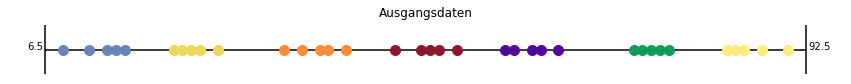

Es ist vermutlich realitv offensichtlich, welche Punkte zusammengehören. Aus sicht des Computers sehen diese allerdings alle gleich aus.

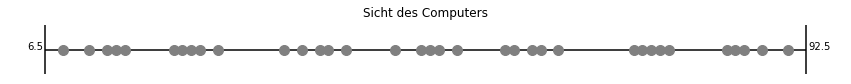

Wie bekommen wir es nun hin, diese Gruppen automatisch zu erkennen? 

---
## Schritt 1: Zufällige Mittelpunkte wählen

Wir wählen zufällig so viele Punkte aus, wie wir die Daten in Gruppen einteilen wollen.

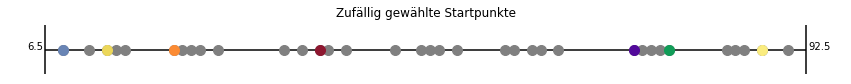

Abstände berechnen und Gruppen zuweisen: 

Point  | C1:Dist(8.50 ) | C2:Dist(13.50) | C3:Dist(21.00) | Result
--------------------------------------------------------------------
13.5   |           5.00 |           0.00 |           7.50 |  C2   
11.5   |           3.00 |           2.00 |           9.50 |  C2   
8.5    |           0.00 |           5.00 |          12.50 |  C1   
15.5   |           7.00 |           2.00 |           5.50 |  C2   
14.5   |           6.00 |           1.00 |           6.50 |  C2   
23.0   |          14.50 |           9.50 |           2.00 |  C3   
21.0   |          12.50 |           7.50 |           0.00 |  C3   
24.0   |          15.50 |          10.50 |           3.00 |  C3   
26.0   |          17.50 |          12.50 |           5.00 |  C3   
22.0   |          13.50 |           8.50 |           1.00 |  C3   
40.5   |          32.00 |          27.00 |          19.50 |  C4   
38.5   |          30.00 |          25.00 |          17.50 |  C4   
35.5   |         

So sehen die Cluster dann nach der ersten zufälligen Zuordnung aus:.

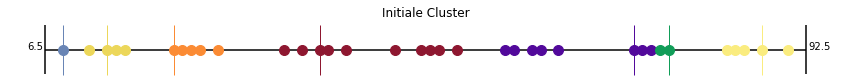

#### Und wie gut ist diese Lösung?

Um die Güte einer Lösung zu bestimmen, berechnen wir die Standardabweichung in jedem Cluster und summieren diese dann auf. Je geringer diese Summe ist desto besser.

Cluster 0 Error: 0.0
Cluster 1 Error: 1.479019945774904
Cluster 2 Error: 1.7204650534085253
Cluster 3 Error: 6.776614198845911
Cluster 4 Error: 6.395494019229476
Cluster 5 Error: 0.5
Cluster 6 Error: 2.4819347291981715


**Error: 19.35352794645699**

---
## Schritt 2: Neue Mittelpunkte berechnen

Jetzt nehmen wir den Mittelpunkt der erzeugten Gruppen als Mittelpunkt für unsere neue Einteilung.

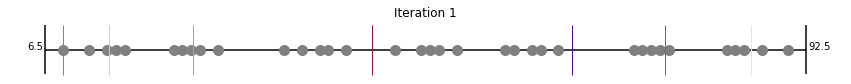

---
## Schritt 3: Die Punkte den neuen Mittelpunkten zuordnen

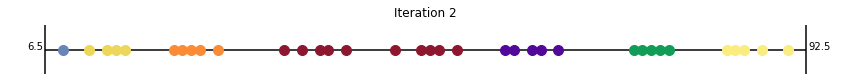

---
## Schritt 4: Solange sich noch etwas verändert, Schritt 2&3 wiederholen

#### Iteration: 2

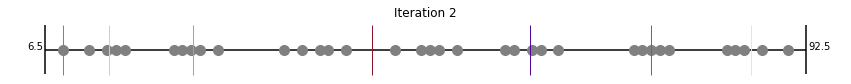

#### Iteration: 3

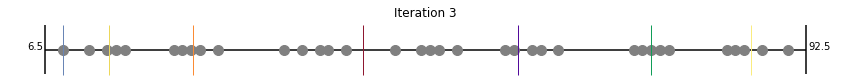

Keine Veränderung mehr, also sind wir fertig!

## Ergebnis: k-means

Cluwter 0: [8.5]
Cluwter 1: [13.5, 11.5, 15.5, 14.5]
Cluwter 2: [23.0, 21.0, 24.0, 26.0, 22.0]
Cluwter 3: [40.5, 38.5, 35.5, 33.5, 37.5, 49.0, 50.0, 51.0, 46.0]
Cluwter 4: [53.0, 61.5, 58.5, 62.5, 59.5, 64.5]
Cluwter 5: [74.0, 77.0, 73.0, 76.0, 75.0]
Cluwter 6: [87.5, 84.5, 90.5, 83.5, 85.5]


## Ground-truth

Clsuter 0: [13.5, 11.5, 8.5, 15.5, 14.5]
Clsuter 1: [23.0, 21.0, 24.0, 26.0, 22.0]
Clsuter 2: [40.5, 38.5, 35.5, 33.5, 37.5]
Clsuter 3: [49.0, 53.0, 50.0, 51.0, 46.0]
Clsuter 4: [61.5, 58.5, 62.5, 59.5, 64.5]
Clsuter 5: [74.0, 77.0, 73.0, 76.0, 75.0]
Clsuter 6: [87.5, 84.5, 90.5, 83.5, 85.5]


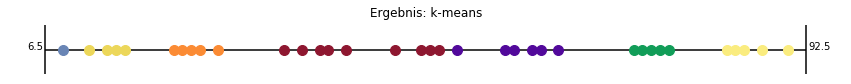

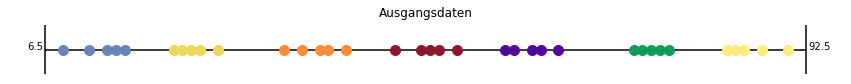

In [33]:
demo_run(n_cluster = 7,vals_per_cluster = 5, seed=45645601)